In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings("ignore")

NUM_EVENTS = 500
P = 0.5
GAMMA = 0.5

#### Barabasi-Albert
- P=1, gamma=1, 10 Networks and 500 events
- fit function: (alpha * ln(t/t_v) +1)^beta

=> we want 
- alpha=(1-gamma)(2-p)/u 
- beta=1/(1-gamma)

In [2]:
# Theoretichal vertex trajectory for stretched exponential distribution
def theoretical_func(x, a, b, start_x):
    return  pow((a*(np.log(x/start_x)) + 1), b)

# Method to fit the theoretical trajectory to the given average trajectory 
def fit_trajectory(xdata, ydata):
    
    popt, pcov = curve_fit(lambda x, a, b: theoretical_func(x, a, b, xdata[0]), xdata, ydata, maxfev=5000, bounds=([0, 1], [np.inf, np.inf]))
    alpha = popt[0]
    beta = popt[1]

    return alpha, beta 


In [3]:
df = pd.read_csv("Chung-Li_p05_g05.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,start_event
0,0,1,2,3,3,3,3,3,3,4,...,37,37,38,38,38,38,38,38,38,1
1,0,1,1,1,1,2,2,2,3,3,...,35,35,35,35,35,35,35,35,35,1
2,0,0,1,1,2,2,2,3,4,4,...,19,19,19,19,19,19,19,20,20,2
3,0,0,0,1,2,3,4,4,4,4,...,24,24,24,24,24,24,24,24,24,3
4,0,0,0,0,0,0,1,1,1,1,...,30,30,30,30,30,30,30,30,30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25230,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,491
25231,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,492
25232,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,493
25233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,496


In [4]:
# retrieve average trajectories by starting year
avg_x = []
avg_y = []
for curr_e in range(2, NUM_EVENTS):
    sub_df = df[df["start_event"]==curr_e]
    
    x, y = [],[]
    for e in range(curr_e, NUM_EVENTS):
        if(len(sub_df)!=0):
            x.append(e)
            y.append(sub_df[str(e)].mean())
        else:
            x.append(e)
            y.append(0)
    
    avg_x.append(x)
    avg_y.append(y)

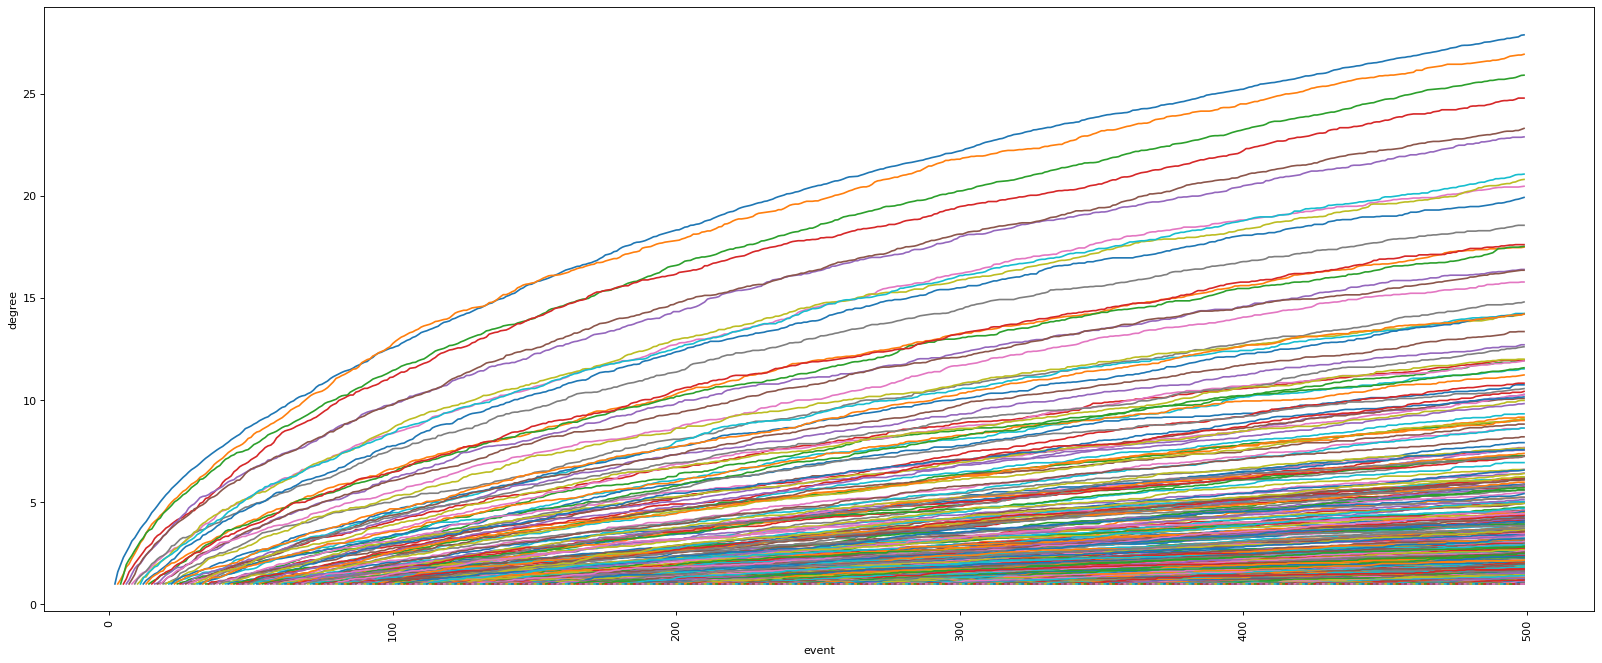

In [5]:
## Plot average trajectories 
plt.figure(figsize=(25, 10), dpi=80)
plt.xlabel("event")
plt.ylabel("degree")
plt.xticks(rotation='vertical')

for x,y in zip(avg_x, avg_y):
    plt.plot(x,y)

plt.show()
    

In [6]:
def get_u(df):        
    sum_deg = 0
    for i in avg_y:
        sum_deg += pow(i[-1], GAMMA)
    
    return sum_deg/NUM_EVENTS

In [7]:
u = get_u(df)
expected_alpha = ((1-GAMMA)*(2-P))/u
expected_beta =  1/(1-GAMMA)
print("u = ", u)

u =  1.7259167966554538


In [8]:
alphas = []
betas = []
diffs_alpha= []
diffs_beta= []

#print("-- event -- \t-- alpha -- \t -- alpha-1/2 --")
for curr_e in range(len(avg_x)):
    x = avg_x[curr_e]
    y = avg_y[curr_e]
    
    alpha, beta = fit_trajectory(x, y)

        
    diff_alpha = "%.4f" % pow(float(alpha) - expected_alpha, 2)
    diff_beta = "%.4f" % pow(float(beta) - expected_beta, 2)
        
    alpha = "%.4f" % alpha
    beta = "%.4f" % beta
    
    alphas.append(float(alpha))
    betas.append(float(beta))

    diffs_alpha.append(float(diff_alpha))
    diffs_beta.append(float(diff_beta))
    #print(curr_e, "\t\t", alpha, "\t\t", diff )



results = pd.DataFrame({"event": range(2, NUM_EVENTS), "alpha": alphas, "beta": betas, "diff_alpha": diffs_alpha, "diff_beta": diffs_beta})
results

,event,alpha,beta,diff_alpha,diff_beta
0,2,0.1493,5.5439,0.0814,12.5589
1,3,0.2695,3.8070,0.0272,3.2652
2,4,0.2699,3.8954,0.0271,3.5926
3,5,0.3819,3.1566,0.0028,1.3378
4,6,0.3336,3.4507,0.0102,2.1046
...,...,...,...,...,...
493,495,0.0071,1.0071,0.1827,0.9858
494,496,0.0071,1.0071,0.1827,0.9858
495,497,0.0141,1.0141,0.1767,0.9719
496,498,0.0279,1.0279,0.1654,0.9450


0.0012418530550258376 1514.5354055138935


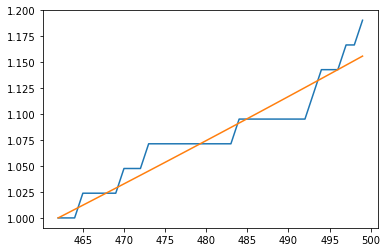

In [19]:
# print one function with his fitting 
curr_e=460
x = avg_x[curr_e]
y = avg_y[curr_e]

alpha, beta = fit_trajectory(x, y)
print(alpha, beta)
fit_y = theoretical_func(x, alpha, beta, np.int64(x[0]))

plt.plot(x,y)
plt.plot(x,fit_y)
plt.show()

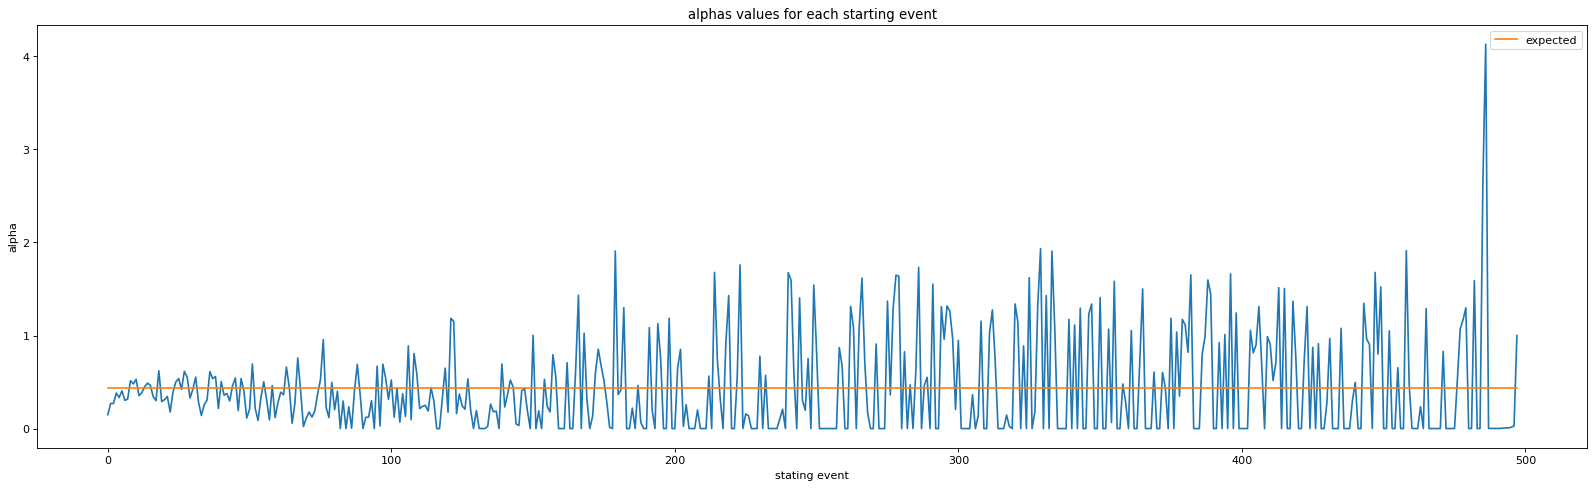

In [9]:
# plot alpha
plt.figure(figsize=(25, 7), dpi=80)
plt.title("alphas values for each starting event")
plt.xlabel("stating event")
plt.ylabel("alpha")
plt.plot([i for i in range(len(results))], results["alpha"])
plt.plot([i for i in range(len(results))], [expected_alpha for i in range(len(results))], label="expected")
plt.legend()
plt.show()

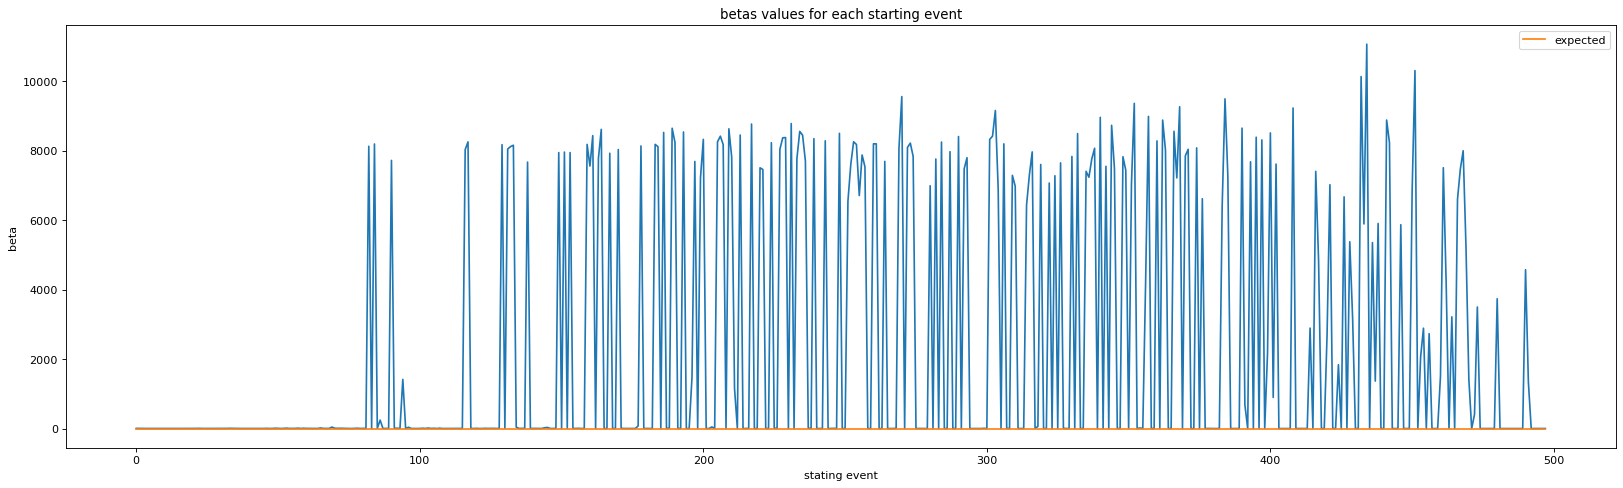

In [10]:
# plot beta
plt.figure(figsize=(25, 7), dpi=80)
plt.title("betas values for each starting event")
plt.xlabel("stating event")
plt.ylabel("beta")
plt.plot([i for i in range(len(results))], results["beta"])
plt.plot([i for i in range(len(results))], [expected_alpha for i in range(len(results))], label="expected")
plt.legend()
plt.show()

In [11]:

print(" -- alpha must be", "%.4f" % expected_alpha, "--")
print(" -- beta must be", "%.4f" % expected_beta, "--\n")

# how many alpha differ from the  expectation of the given tolerance
print("-- #alphas such that alpha-((1-u)*(2-P))/u < tolerance -- ")
tolerance = 0.0
while tolerance <= 2:
    print("tolerance =", "%.1f"%tolerance, "-> #aphas =", len(results[pow(results["diff_alpha"],1/2) <= tolerance]))
    tolerance += 0.1
    
print()

print("-- #betas such that beta-((1-GAMMA) < tolerance -- ")
tolerance = 0.0
while tolerance <= 2:
    print("tolerance <=", "%.1f"%tolerance, "-> #betas =", len(results[pow(results["diff_beta"],1/2) <= tolerance]))
    tolerance += 0.1

 -- alpha must be 0.4346 --
 -- beta must be 2.0000 --

-- #alphas such that alpha-((1-u)*(2-P))/u < tolerance -- 
tolerance = 0.0 -> #aphas = 3
tolerance = 0.1 -> #aphas = 60
tolerance = 0.2 -> #aphas = 119
tolerance = 0.3 -> #aphas = 173
tolerance = 0.4 -> #aphas = 208
tolerance = 0.5 -> #aphas = 409
tolerance = 0.6 -> #aphas = 422
tolerance = 0.7 -> #aphas = 436
tolerance = 0.8 -> #aphas = 446
tolerance = 0.9 -> #aphas = 460
tolerance = 1.0 -> #aphas = 470
tolerance = 1.1 -> #aphas = 475
tolerance = 1.2 -> #aphas = 483
tolerance = 1.3 -> #aphas = 491
tolerance = 1.4 -> #aphas = 492
tolerance = 1.5 -> #aphas = 496
tolerance = 1.6 -> #aphas = 496
tolerance = 1.7 -> #aphas = 496
tolerance = 1.8 -> #aphas = 496
tolerance = 1.9 -> #aphas = 496

-- #betas such that beta-((1-GAMMA) < tolerance -- 
tolerance <= 0.0 -> #betas = 1
tolerance <= 0.1 -> #betas = 7
tolerance <= 0.2 -> #betas = 18
tolerance <= 0.3 -> #betas = 31
tolerance <= 0.4 -> #betas = 41
tolerance <= 0.5 -> #betas = 52
toler

In [12]:
results.sort_values(by="diff_alpha",  ascending=True)

,event,alpha,beta,diff_alpha,diff_beta
114,116,0.4413,2.8229,0.0000,0.6771
102,104,0.4344,2.9717,0.0000,0.9442
147,149,0.4292,2.5689,0.0000,0.3236
30,32,0.4231,3.0856,0.0001,1.1786
143,145,0.4448,2.8264,0.0001,0.6829
...,...,...,...,...,...
333,335,1.9075,1.0000,2.1695,1.0000
458,460,1.9120,1.0000,2.1828,1.0000
329,331,1.9325,1.0000,2.2439,1.0000
485,487,2.6326,1.0000,4.8314,1.0000


In [13]:
results.sort_values(by="diff_beta",  ascending=True)

,event,alpha,beta,diff_alpha,diff_beta
497,499,1.0000,2.0000,0.3197,0.000000e+00
174,176,0.6754,1.9796,0.0580,4.000000e-04
364,366,0.7274,2.0196,0.0857,4.000000e-04
157,159,0.7935,2.0323,0.1289,1.000000e-03
139,141,0.6942,2.0359,0.0674,1.300000e-03
...,...,...,...,...,...
384,386,0.0001,9490.2614,0.1887,9.002710e+07
270,272,0.0001,9555.1907,0.1887,9.126345e+07
432,434,0.0002,10129.1124,0.1887,1.025584e+08
451,453,0.0002,10302.3482,0.1887,1.060972e+08


# General Fitting

In [14]:
# errors
import sys
from scipy.optimize import minimize 
import math

## error function to minimize in order to find alpha* and beta*
    ## this function compare f* with real data 
def err_f_A(params):
    # print(params)
    opt_alpha, opt_beta = params
    err = 0
    for curr_e in range(len(avg_x)):
        x,y = avg_x[curr_e], avg_y[curr_e]
        for e in range(curr_e, len(x)):
            f_star = theoretical_func(np.int64(e), opt_alpha, opt_beta, np.int64(x[curr_e]))
            if("-inf" != str(f_star) and "inf" != str(f_star) and not (math.isnan(f_star))):
                err += pow(abs(f_star - y[e]), 2)
                    
    sys.stdout.write('\r'+ "optimizing A function with -> params: " + str(params) +", error: "+ str(err))
    return err

SUBSET_SIZE = 200 # the next error function works on all events, choose the number of event to be considered 

## error function to minimize in order to find alpha* and beta*
    ## this function compare f* with fitted data f_i 
        ## we consider a subset of events for computational costs
def err_f_C(params):
    opt_alpha, opt_beta = params
    
    size = SUBSET_SIZE # subset of events to consider 

    err = 0
    for curr_e in range(len(avg_x)):
        x,y = avg_x[curr_e], avg_y[curr_e]
        alpha, beta = alpha, beta = fit_trajectory(x, y)
        fit_y  = theoretical_func(x, alpha, beta, np.int64(x[0]))
        
        
        all_events = [e for e in range(curr_e, len(avg_x)-1)]
        next_events = all_events
        n = (len(next_events))//size
            
        if(n>0):
            events_subset = [next_events[e] for e in range(len(next_events)) if e%n==0][:size]
        
            for e in events_subset:
                if(e>curr_e):                
                    f_star = theoretical_func(np.int64(e), opt_alpha, opt_beta, np.int64(x[0]))
                    if("-inf" != str(f_star) and "inf" != str(f_star) and not (math.isnan(f_star))):
                        err += pow(abs(f_star - theoretical_func(np.int64(e), alpha, beta, np.int64(x[0]))), 2)
                        
    sys.stdout.write('\r'+ "optimizing C function with " + str(size) + " events -> params: " + str(params) +", error: "+ str(err))
    return err



In [15]:
## optimize alpha* and beta* for each error function defined above 
alphas_opt,betas_opt, errs = [],[],[]

start_params = [1, 1]
bnds = ((0, None), (1, None))

# retrieve alpha* and beta* minimizing the associated function and
    # compute the error made by the optimized parameters 

'''result_A = minimize(err_f_A, start_params, bounds=bnds)
fitted_params_A = result_A.x
alphas_opt.append(fitted_params_A[0])
betas_opt.append(fitted_params_A[1])
errs.append(err_f_A(fitted_params_A))
print()'''


result_C = minimize(err_f_C, [1, 1], bounds=bnds)
fitted_params_C = result_C.x
alphas_opt.append(fitted_params_C[0])
betas_opt.append(fitted_params_C[1])
errs.append(err_f_C(fitted_params_C))
print()

# optimizing A function with -> params: [4.94508748 1.00330144], error: 101462.55321939185
# optimizing C function with 200 events -> params: [0.71552378 2.14158246], error: 12717.860695442623


optimizing C function with 200 events -> params: [0.71552378 2.14158246], error: 12717.860695442623


In [18]:
alphas_opt = [4.94508748,0.71552378]
betas_opt = [1.00330144, 2.14158246]
errs = [ 101462.55321939185, 12717.860695442623]

print()
print(pd.DataFrame([[errs[i], alphas_opt[i], betas_opt[i]] for i in range(len(errs))], ["err_f_A", "err_f_C", ], ["ERROR", "alpha", "beta",]))


                 ERROR     alpha      beta
err_f_A  101462.553219  4.945087  1.003301
err_f_C   12717.860695  0.715524  2.141582
